In [1]:
import pandas as pd
import numpy as np
import os
import sys

#!pip install librosa
#!pip install lifelines
#!pip install np_utils
#!pip install tensorflow

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

## Importing and Splitting the datasets

In [2]:
#importing the datasets (train_set_augmented for all landmarks, train_set_augmented_simplified for simplified landmarks)
train_set = pd.read_csv('outputs/train_set_augmented_simplified.csv')
test_set = pd.read_csv('outputs/test_set_augmented_simplified.csv')

In [3]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

In [4]:
x_test

,lm_1_x,lm_1_y,lm_1_z,lm_2_x,lm_2_y,lm_2_z,lm_3_x,lm_3_y,lm_3_z,lm_4_x,...,lm_138_z,lm_139_x,lm_139_y,lm_139_z,lm_140_x,lm_140_y,lm_140_z,lm_141_x,lm_141_y,lm_141_z
0,0.257999,0.383563,0.002389,0.283292,0.362782,-0.032297,0.322953,0.348970,-0.058516,0.375499,...,0.001229,0.444767,0.598483,-0.056526,0.518412,0.577950,-0.142952,0.589326,0.579395,-0.052673
1,0.282253,0.397349,-0.028642,0.300388,0.386589,-0.064933,0.330824,0.386955,-0.094734,0.374753,...,-0.041174,0.422601,0.649090,-0.035052,0.484339,0.656519,-0.120428,0.556651,0.648746,-0.039090
2,0.258242,0.379813,0.009708,0.282656,0.356962,-0.026476,0.320692,0.348820,-0.058481,0.372836,...,-0.021388,0.413151,0.622779,-0.052390,0.494023,0.613141,-0.144953,0.577083,0.620769,-0.060317
3,0.221798,0.334395,-0.003371,0.250602,0.307004,-0.041484,0.298948,0.292374,-0.070419,0.364995,...,0.009754,0.424747,0.605174,-0.065478,0.528478,0.588356,-0.159651,0.612554,0.601387,-0.051614
4,0.250935,0.355763,-0.007931,0.280926,0.337461,-0.043914,0.324523,0.327115,-0.069436,0.380709,...,0.002890,0.417247,0.606256,-0.056156,0.506806,0.593717,-0.145801,0.583188,0.613328,-0.048423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,0.191135,0.237120,0.031330,0.228589,0.213849,-0.017328,0.280645,0.208135,-0.056963,0.347044,...,0.004447,0.348511,0.617055,-0.068857,0.444250,0.595785,-0.192212,0.536449,0.650053,-0.069122
6142,0.264686,0.455834,0.023847,0.282105,0.435464,-0.011506,0.312633,0.421638,-0.040356,0.359339,...,-0.003943,0.451395,0.625757,-0.048200,0.512291,0.597729,-0.137514,0.582184,0.602987,-0.052370
6143,0.286792,0.410484,0.006486,0.310216,0.395450,-0.024308,0.344077,0.389096,-0.048833,0.389195,...,0.000353,0.436912,0.614890,-0.042814,0.493253,0.598257,-0.120417,0.546521,0.617015,-0.040647
6144,0.267603,0.436940,0.046024,0.288332,0.410100,0.022081,0.322501,0.392111,0.002444,0.371539,...,0.044757,0.449140,0.617655,-0.055787,0.506478,0.570890,-0.122772,0.564335,0.607856,-0.043967


In [5]:
y_test

0         happy
1         happy
2         happy
3         happy
4         happy
         ...   
6141    neutral
6142    neutral
6143    neutral
6144    neutral
6145    neutral
Name: label, Length: 6146, dtype: object

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#Get the labels
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((28263, 423, 1), (28263, 4), (6146, 423, 1), (6146, 4))

In [9]:
def init_model(x_train):
    model= Sequential()
    model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    
    model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
    
    model.add(Flatten())
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(units=4, activation='softmax'))
    model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

    return model


model = init_model(x_train)
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 423, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 212, 256)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 212, 128)          163968    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 106, 128)          0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 106, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 106, 64)         

In [10]:
def train_model(model, folder, x_train, y_train, x_test, y_test):
    checkpoint_filepath = os.getcwd() + '/' + folder + '/Epoch{epoch:02d}_{accuracy:.2f}.keras'
    checkpoint_filepath

    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='max')

    early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.8, verbose=1, patience=2, min_lr=0.0001)

    history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[model_checkpoint_callback, early_stopping_callback, rlrp])
    return history

In [11]:
history = train_model(model, 'ckpt_cnn',  x_train, y_train, x_test, y_test)

Epoch 1/50


442/442 [==============================] - 24s 50ms/step - loss: 1.1438 - accuracy: 0.4872 - val_loss: 0.9492 - val_accuracy: 0.6020 - lr: 0.0010
Epoch 2/50
442/442 [==============================] - 21s 49ms/step - loss: 0.9857 - accuracy: 0.5674 - val_loss: 0.9001 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 3/50
442/442 [==============================] - 21s 48ms/step - loss: 0.9437 - accuracy: 0.5852 - val_loss: 0.8678 - val_accuracy: 0.6320 - lr: 0.0010
Epoch 4/50
442/442 [==============================] - 21s 49ms/step - loss: 0.9163 - accuracy: 0.6022 - val_loss: 0.8369 - val_accuracy: 0.6429 - lr: 0.0010
Epoch 5/50
442/442 [==============================] - 22s 49ms/step - loss: 0.8987 - accuracy: 0.6131 - val_loss: 0.8292 - val_accuracy: 0.6481 - lr: 0.0010
Epoch 6/50
442/442 [==============================] - 22s 49ms/step - loss: 0.8916 - accuracy: 0.6164 - val_loss: 0.8309 - val_accuracy: 0.6515 - lr: 0.0010
Epoch 7/50
442/442 [==============================] - 22

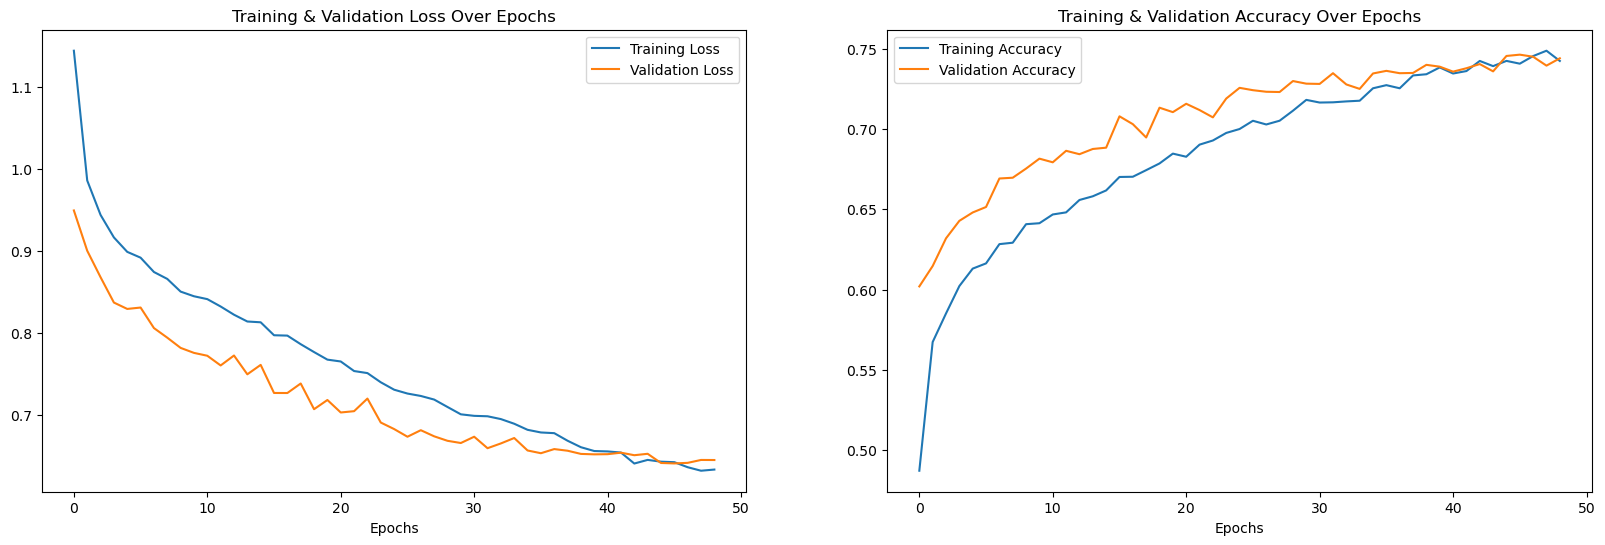

In [13]:
epochs = [i for i in range(49)]
fig, ax = plt.subplots(1,2)
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
test_accuracy = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss, label = 'Training Loss')
ax[0].plot(epochs, test_loss, label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss Over Epochs')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_accuracy, label = 'Training Accuracy')
ax[1].plot(epochs, test_accuracy, label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy Over Epochs')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [14]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

193/193 [==============================] - 1s 6ms/step


In [15]:
y_pred

array([['happy'],
       ['neutral'],
       ['happy'],
       ...,
       ['neutral'],
       ['neutral'],
       ['neutral']], dtype=object)

        anger happy neutral  sad
anger    1180    32     257  178
happy      32  1574      86   65
neutral   137    30     955  179
sad       213    44     320  864


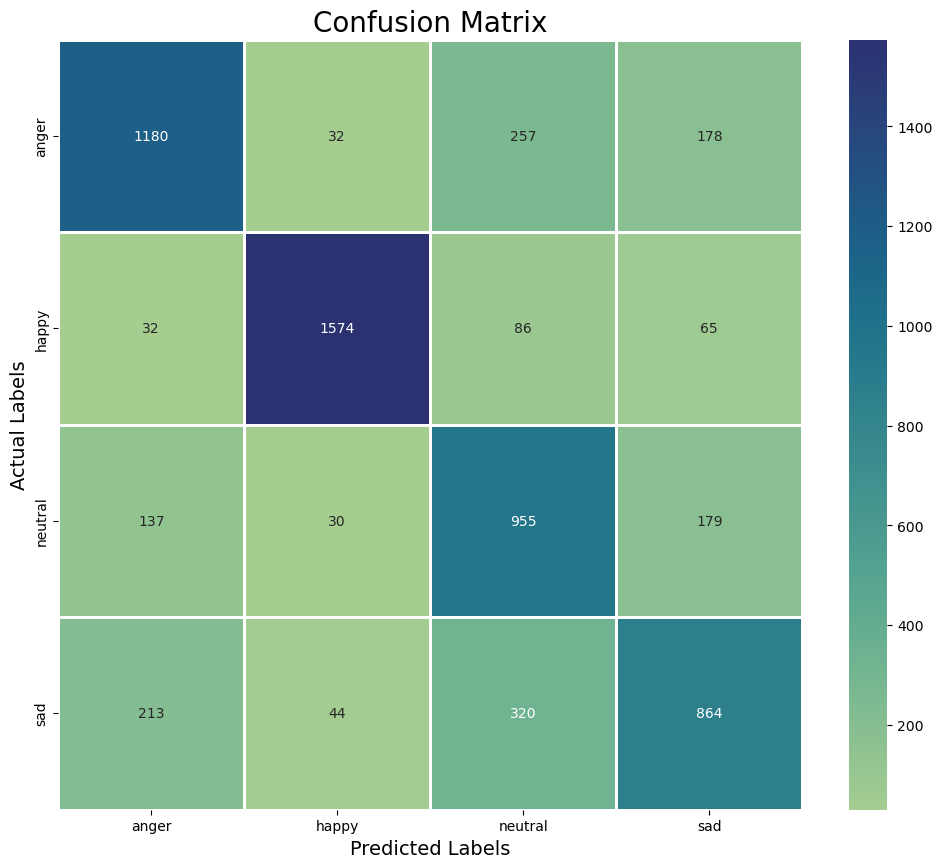

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='crest', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
print(cm)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acs_test = accuracy_score(y_test,y_pred)
ps_test = precision_score(y_test,y_pred, average = "macro")
rs_test = recall_score(y_test,y_pred,  average = "macro")
fs_test = f1_score(y_test,y_pred,  average = "macro")

print("Accuracy Score: ", "{:.2%}".format(acs_test))
print("Precision Score: ", "{:.2%}".format(ps_test))
print("Recall Score: ", "{:.2%}".format(rs_test))
print("F1 Score: ", "{:.2%}".format(fs_test))

Accuracy Score:  74.41%
Precision Score:  73.86%
Recall Score:  73.65%
F1 Score:  73.48%


In [18]:
#K fold Cross Validation Module

#1. Get all rows together
all_data_df = pd.concat([train_set, test_set])
num_rows = len(all_data_df.index)

In [19]:
#2. Shuffle rows
all_data_df = all_data_df.sample(frac=1).reset_index()
all_data_df = all_data_df.drop(columns=['index'])    

In [20]:
#K fold cross validation for k=5 (5 runs)
fold_num_rows = num_rows // 5
last_fold_num_rows = num_rows - (fold_num_rows * 4)

confusion_matrices = []
scores = []
for i in range(0, 5):
    #Get number of rows to retrieve
    start = i * fold_num_rows
    end = (i + 1) * fold_num_rows
    if i == 4:
        end = num_rows

    print("K =", str(i+1), "getting images from", str(start), "to", str(end))
    
    #Construct train and test split using iloc
    test_df = all_data_df.iloc[start:end, : ]
    train_df = pd.concat([all_data_df, test_df]).drop_duplicates(keep=False)

    x_train = train_df.iloc[:, 1:]
    y_train = train_df['label']
    
    x_test = test_df.iloc[:, 1:]
    y_test = test_df['label']

    encoder = OneHotEncoder()
    y_train = encoder.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
    y_test = encoder.fit_transform(np.array(y_test).reshape(-1,1)).toarray()

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    x_train = np.expand_dims(x_train, axis=2)
    x_test = np.expand_dims(x_test, axis=2)

    #Train the model
    model = init_model(x_train)
    history = train_model(model, 'ckpt_cnn_k' + str(i+1), x_train, y_train, x_test, y_test)

    #Evaluate the model
    pred_test = model.predict(x_test)
    y_pred = encoder.inverse_transform(pred_test)
    y_test = encoder.inverse_transform(y_test)

    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
    
    acs_test = accuracy_score(y_test,y_pred)
    ps_test = precision_score(y_test,y_pred, average = "macro")
    rs_test = recall_score(y_test,y_pred,  average = "macro")
    fs_test = f1_score(y_test,y_pred,  average = "macro")

    fold_score = {
        "accuracy": acs_test,
        "precision": ps_test,
        "recall": rs_test,
        "f1": fs_test
    }

    #Save the scores
    confusion_matrices.append(cm)
    scores.append(fold_score)

K = 1 getting images from 0 to 6881
Epoch 1/50
396/396 [==============================] - 21s 50ms/step - loss: 1.1409 - accuracy: 0.5033 - val_loss: 0.9826 - val_accuracy: 0.5819 - lr: 0.0010
Epoch 2/50
396/396 [==============================] - 19s 49ms/step - loss: 0.9747 - accuracy: 0.5727 - val_loss: 0.9592 - val_accuracy: 0.6002 - lr: 0.0010
Epoch 3/50
396/396 [==============================] - 19s 49ms/step - loss: 0.9331 - accuracy: 0.5912 - val_loss: 0.9308 - val_accuracy: 0.6147 - lr: 0.0010
Epoch 4/50
396/396 [==============================] - 20s 50ms/step - loss: 0.9108 - accuracy: 0.6044 - val_loss: 0.8993 - val_accuracy: 0.6181 - lr: 0.0010
Epoch 5/50
396/396 [==============================] - 20s 51ms/step - loss: 0.8912 - accuracy: 0.6175 - val_loss: 0.8349 - val_accuracy: 0.6431 - lr: 0.0010
Epoch 6/50
396/396 [==============================] - 21s 53ms/step - loss: 0.8770 - accuracy: 0.6197 - val_loss: 0.8599 - val_accuracy: 0.6495 - lr: 0.0010
Epoch 7/50
396/396 [==

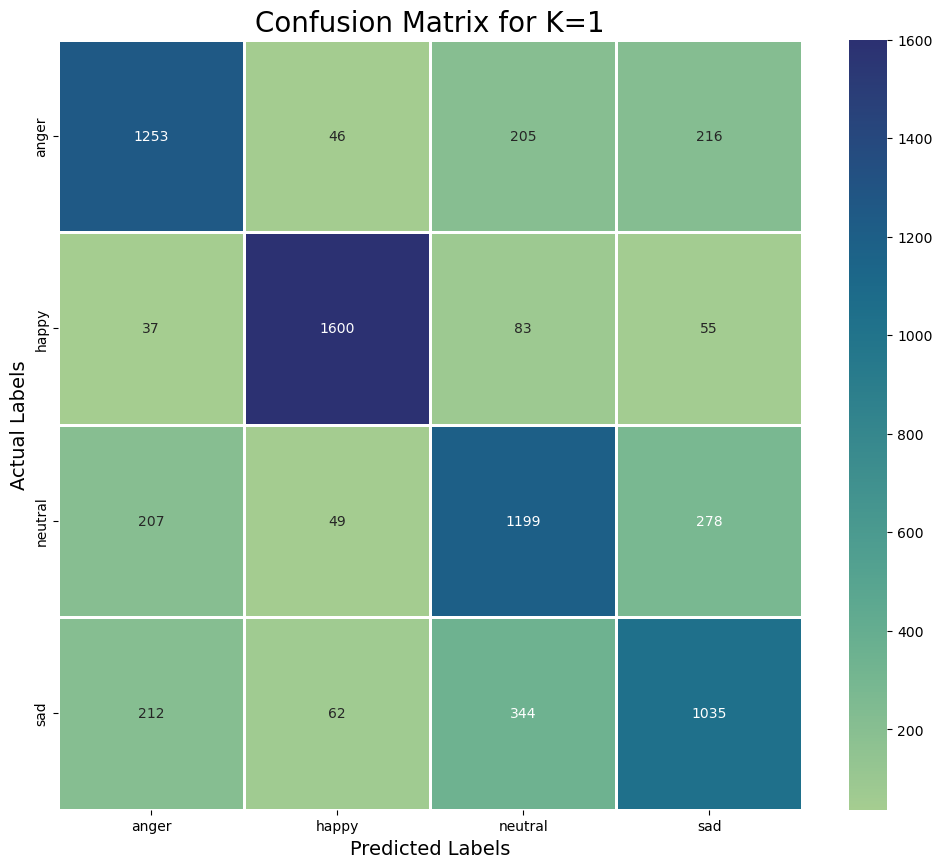

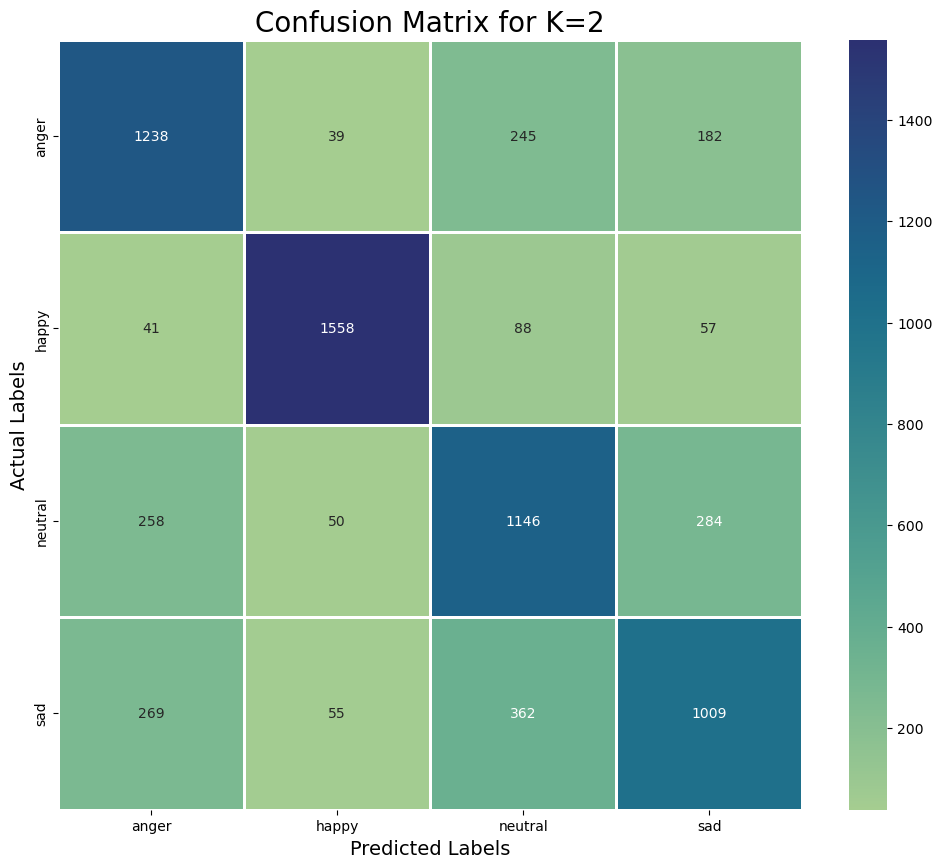

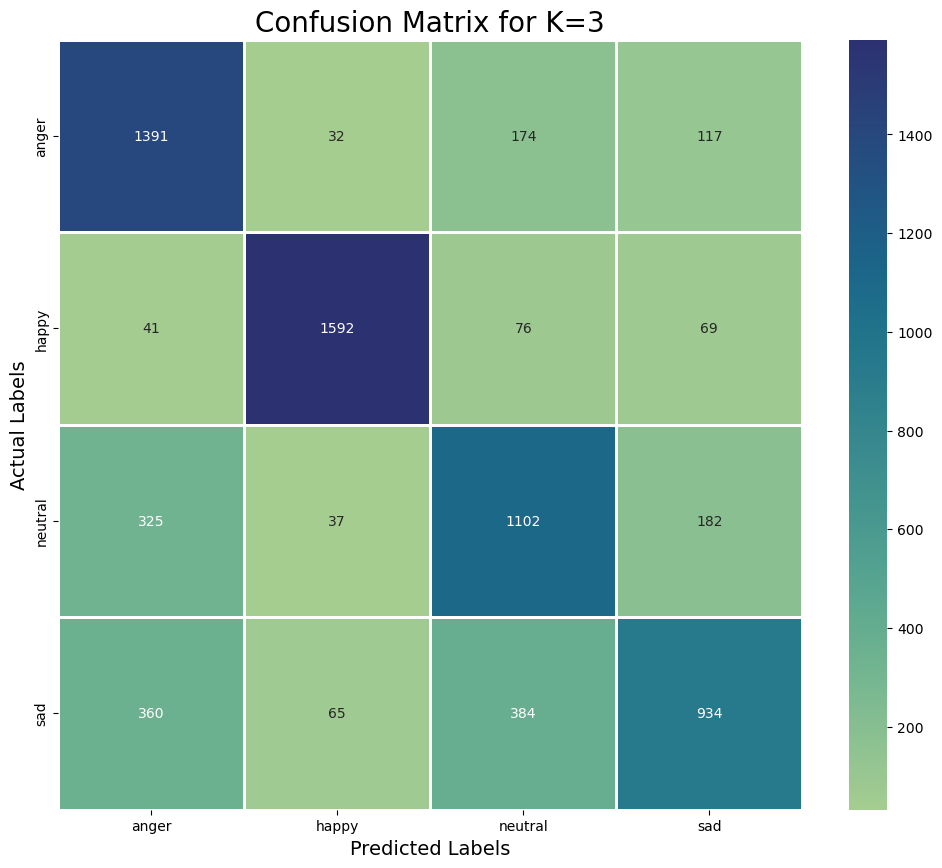

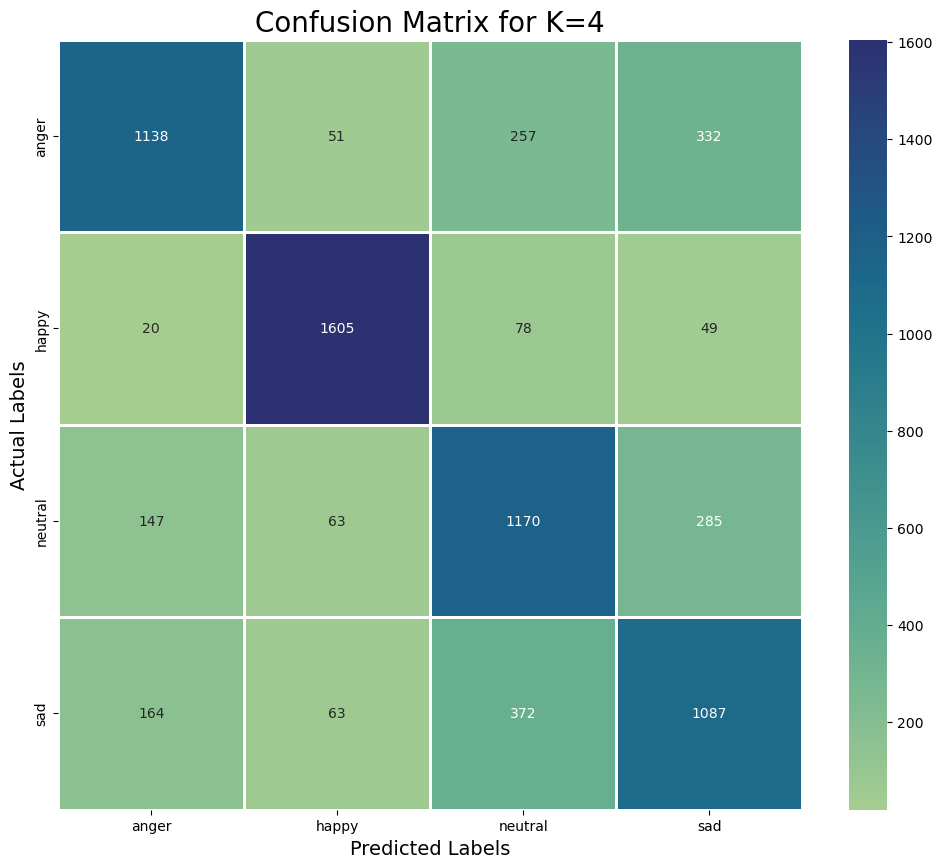

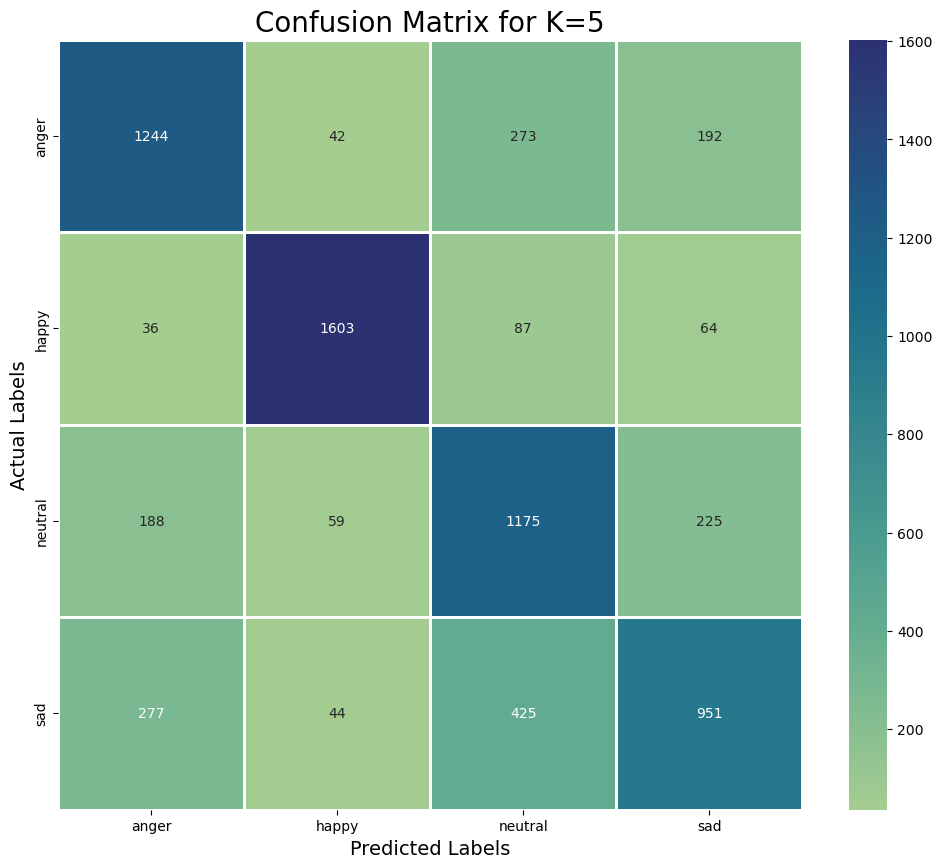

In [21]:
#Show each result in confusion matrix
for i in range(len(confusion_matrices)):
    cm = confusion_matrices[i]
    plt.figure(figsize = (12, 10))
    sns.heatmap(cm, linecolor='white', cmap='crest', linewidth=1, annot=True, fmt='')
    plt.title('Confusion Matrix for K='+str(i+1), size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)

In [22]:
#Show each score and summarize results

cross_val_score = {
    "accuracy": 0,
    "precision": 0,
    "recall": 0,
    "f1": 0
}
for i in range(len(scores)):
    acs_test = scores[i]['accuracy']
    ps_test = scores[i]['precision']
    rs_test = scores[i]['recall']
    fs_test = scores[i]['f1']
    
    print("Score Summary for K =",str(i+1))
    print("Accuracy Score: ", "{:.2%}".format(acs_test))
    print("Precision Score: ", "{:.2%}".format(ps_test))
    print("Recall Score: ", "{:.2%}".format(rs_test))
    print("F1 Score: ", "{:.2%}".format(fs_test))

    cross_val_score['accuracy'] += acs_test
    cross_val_score['precision'] += ps_test
    cross_val_score['recall'] += rs_test
    cross_val_score['f1'] += fs_test

cross_val_score['accuracy'] /= 5
cross_val_score['precision'] /= 5
cross_val_score['recall'] /= 5
cross_val_score['f1'] /= 5

Score Summary for K = 1
Accuracy Score:  73.93%
Precision Score:  73.80%
Recall Score:  73.70%
F1 Score:  73.73%
Score Summary for K = 2
Accuracy Score:  71.95%
Precision Score:  72.05%
Recall Score:  71.86%
F1 Score:  71.89%
Score Summary for K = 3
Accuracy Score:  72.94%
Precision Score:  73.29%
Recall Score:  72.81%
F1 Score:  72.50%
Score Summary for K = 4
Accuracy Score:  72.66%
Precision Score:  72.97%
Recall Score:  72.59%
F1 Score:  72.55%
Score Summary for K = 5
Accuracy Score:  72.23%
Precision Score:  72.34%
Recall Score:  72.00%
F1 Score:  71.93%


In [23]:
acs_test = cross_val_score['accuracy']
ps_test = cross_val_score['precision']
rs_test = cross_val_score['recall']
fs_test = cross_val_score['f1']

print("5-Fold Cross Validation Score Summary")
print("Accuracy Score: ", "{:.2%}".format(acs_test))
print("Precision Score: ", "{:.2%}".format(ps_test))
print("Recall Score: ", "{:.2%}".format(rs_test))
print("F1 Score: ", "{:.2%}".format(fs_test))


5-Fold Cross Validation Score Summary
Accuracy Score:  72.74%
Precision Score:  72.89%
Recall Score:  72.59%
F1 Score:  72.52%
